<a href="https://colab.research.google.com/github/jonnythebard/tf2_workbook/blob/master/ann_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Tensorflow
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.0-rc1


In [2]:
# load in the data
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0 # normalize values to 0~1
print("X_train.shape:", X_train.shape)

X_train.shape: (60000, 28, 28)


In [3]:
# build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="softmax"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [5]:
# train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2923 - accuracy: 0.9155 - val_loss: 0.1341 - val_accuracy: 0.9589
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1422 - accuracy: 0.9588 - val_loss: 0.1018 - val_accuracy: 0.9682
Epoch 3/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1064 - accuracy: 0.9676 - val_loss: 0.0865 - val_accuracy: 0.9734
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0865 - accuracy: 0.9730 - val_loss: 0.0840 - val_accuracy: 0.9751
Epoch 5/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0739 - accuracy: 0.9764 - val_loss: 0.0717 - val_accuracy: 0.9791
Epoch 6/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0655 - accuracy: 0.9791 - val_loss: 0.0751 - val_accuracy: 0.9770
Epoch 7/10
60000/60000 [==============================] 

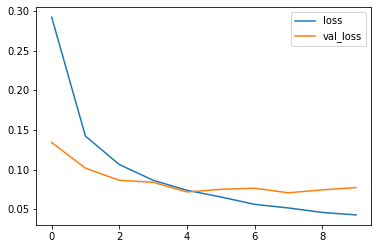

In [6]:
# plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

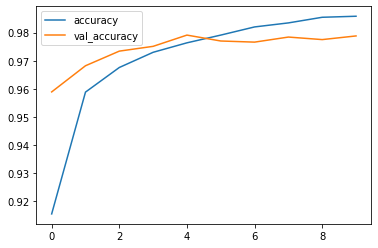

In [7]:
# plot accuracy per iteration
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()

In [8]:
# evaluate the model
print(model.evaluate(X_test, y_test))

10000/10000 [==============================] - 1s 54us/sample - loss: 0.0773 - accuracy: 0.9788
[0.07727030847015849, 0.9788]
